# Dungeons and Data

A scientific approach to stupid questions that dice rollers care about.  Also a means to train myself in python, numpy, padas, matplotlib, and other tools so I'm not totally reliant on R.

### Attack Bonus vs Damage Bonus

Having played for several years since the release of 3rd edition I find myself playing a 5th edition campaign as a ranger.  Rangers must choose a fighting style and I was torn between choosing archery and and dueling.  Archery grants a +2 bonus to attacks with ranged weapons and dueling grantgs a +2 bonus to damage when fighting with a single melee weapon.  Since attacks and damage are two complementary parts of killing enemies, I thought I'd take a look into which was the better choice.

### Data
I acquired a dataset of (I think) all the monsters in the 5th edition Monster Manual with some key stats.  The stats I'm most interested in, however, are Challenge Rating (so see how difficult a monster is supposed to be to kill) and Armor Class (to see how difficult a monster is to hit).  We load that here.

In [7]:
%matplotlib inline
import pandas as pd, numpy as np

In [2]:
monsterStats = pd.read_csv("5eMonsters.csv")

In [3]:
monsterStats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 11 columns):
name    428 non-null object
type    428 non-null object
aln     428 non-null object
cr      428 non-null object
ac      428 non-null int64
hp      428 non-null int64
spc     428 non-null object
at1     423 non-null object
at2     216 non-null object
p       428 non-null int64
crd     428 non-null float64
dtypes: float64(1), int64(3), object(7)
memory usage: 40.1+ KB


In [23]:
monsterStats[['name','ac', 'crd']][:12]

,name,ac,crd
0,Aarakocra,12,0.25
1,Aboleth,17,10.00
2,Abominable Yeti,15,9.00
3,Acolyte,10,0.25
4,Air Elemental,15,5.00
5,Allosaurus,13,2.00
6,Androsphinx,17,17.00
7,Animated Armor,18,1.00
8,Ankheg,14,2.00
9,Ankylosaurus,15,3.00


Let's look at how many monsters there are with each armor class.  We'll sort first by how many of each class there are, then sort by armor class.

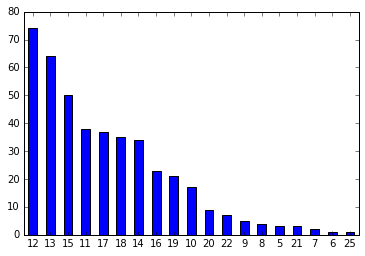

In [34]:
monsterStats['ac'].value_counts().plot(kind='bar', rot=0)

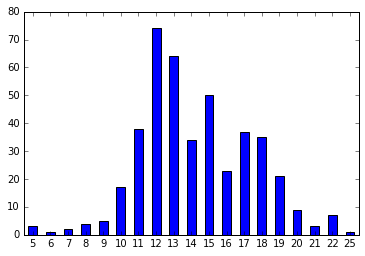

In [35]:
monsterStats['ac'].value_counts().sort_index(0).plot(kind='bar', rot=0)

About what you'd expect: a roughly normal distribution with some odd drops at 14 and 16.  12, 13, and 15 are the standouts.  Next let's look and see how they're distributed by challenge rating.